# Practical work 6 : Harris Corner Detector

The goal of this pratical work is to implement the Harris-Stephen's corners detector (C. Harris and M. Stephens. A combined corner and edge detector. In Proc. Fourth Alvey Vision Conference, pages 147–151, 1988).

Recall the Harris detector computes a map of corners from an image $I$:
$$
R(x,y) = \operatorname{det}(M) - k (\operatorname{trace}(M))^2, (x,y) \text{pixels}
$$
with $k\in[0.04, 0.06]$. $M$ is the auto-correlation of image $I$:
$$
M=\begin{pmatrix}
\sum_{x,y \in W} w(x,y)I_x^2 &
\sum_{x,y \in W} w(x,y)I_xI_y \\
\sum_{x,y \in W} w(x,y)I_xI_y &
\sum_{x,y \in W} w(x,y)I_y^2 
\end{pmatrix}
=\begin{pmatrix}
A & B \\ C & D
\end{pmatrix}
$$
with $w(x,y)=\frac1{2\pi \sigma^2}e^{\frac{(x-x_c)^2 + (y-y_c)^2}{2\sigma^2}}$ a Gaussian mask centered on the window $W$. Partial derivatives $I_x$ and $I_y$ are estimated by one of the following kernels :
- Gradient:  $G_x = \begin{pmatrix} 0 & 0 & 0\\ 1 & 0 &-1 \\ 0 & 0 & 0 \end{pmatrix}$,
 $G_y = G_x^T$
- Prewitt: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 1 & 0 &-1 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
- Sobel: $G_x = \begin{pmatrix} 1 & 0 & -1\\ 2 & 0 &-2 \\ 1 & 0 & -1 \end{pmatrix}$,
 $G_y = G_x^T$
 


In [5]:
# Load useful libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from pylab import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Useful functions 
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

## Exercise 1: Harris response calculation

1) Write a function `computeR(I, scale, kappa)` that returns the Harris response $R$ from an image $I$ and a scale $scale$. You will use 5 steps:
- Computation of the directionnal derivate $I_x$ and $I_y$. Use the Sobel kernel.
- Computation of the products $I_x^2$, $I_y^2$, $I_x.I_y$.
- Computation of the convolution of $I_x^2$, $I_y^2$ and $I_x.I_y$ by a gaussian kernel of size N (use given function `gaussianKernel()`)
- Computation of $\operatorname{det}(M(x,y))$ and $\operatorname{trace}(M(x,y))$ for each pixel
- Computation of $R(x,y) = \operatorname{det}(M(x,y)) - k.(\operatorname{trace}(M(x,y)))^2$. You can use $k = 0.04$.

 You can compute the convolutions by using the ```scipy.signal.convolve2d``` function. 


In [6]:
def computeR(image,scale,kappa):
    sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ix = scipy.signal.convolve2d(image, sobel_kernel, mode="same")
    Iy = scipy.signal.convolve2d(image, np.transpose(sobel_kernel), mode="same")
    convIx2 = scipy.signal.convolve2d(Ix**2, gaussianKernel(scale), mode="same")
    convIy2 = scipy.signal.convolve2d(Iy**2, gaussianKernel(scale), mode="same")
    convIxIy = scipy.signal.convolve2d(Ix*Iy, gaussianKernel(scale), mode="same")
    det_m = convIx2*convIy2 - convIxIy**2
    trace_m = convIx2 + convIy2
    R = det_m - kappa*pow(trace_m,2)
    return R

2) Write a script that displays the Harris response for the image ```img/house2.png``` along with the original image. Use a gaussian window of size $W=15$ pixels.

Text(0.5, 1.0, 'Harris Response')

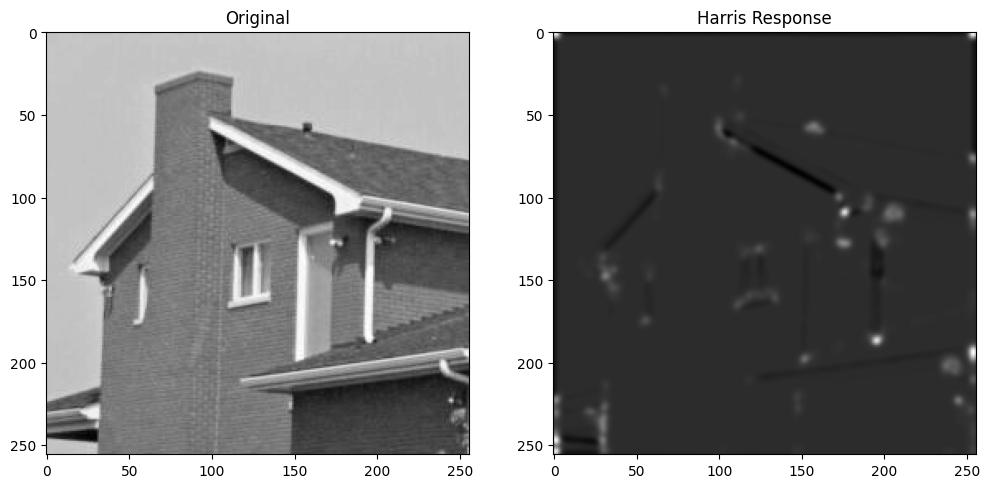

In [7]:
img = np.array(Image.open("img/house2.png"))
harris = computeR(img, 2.3,0.04)

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(harris, cmap="gray")
ax[1].set_title("Harris Response")

Text(0.5, 1.0, 'kappa 0.3')

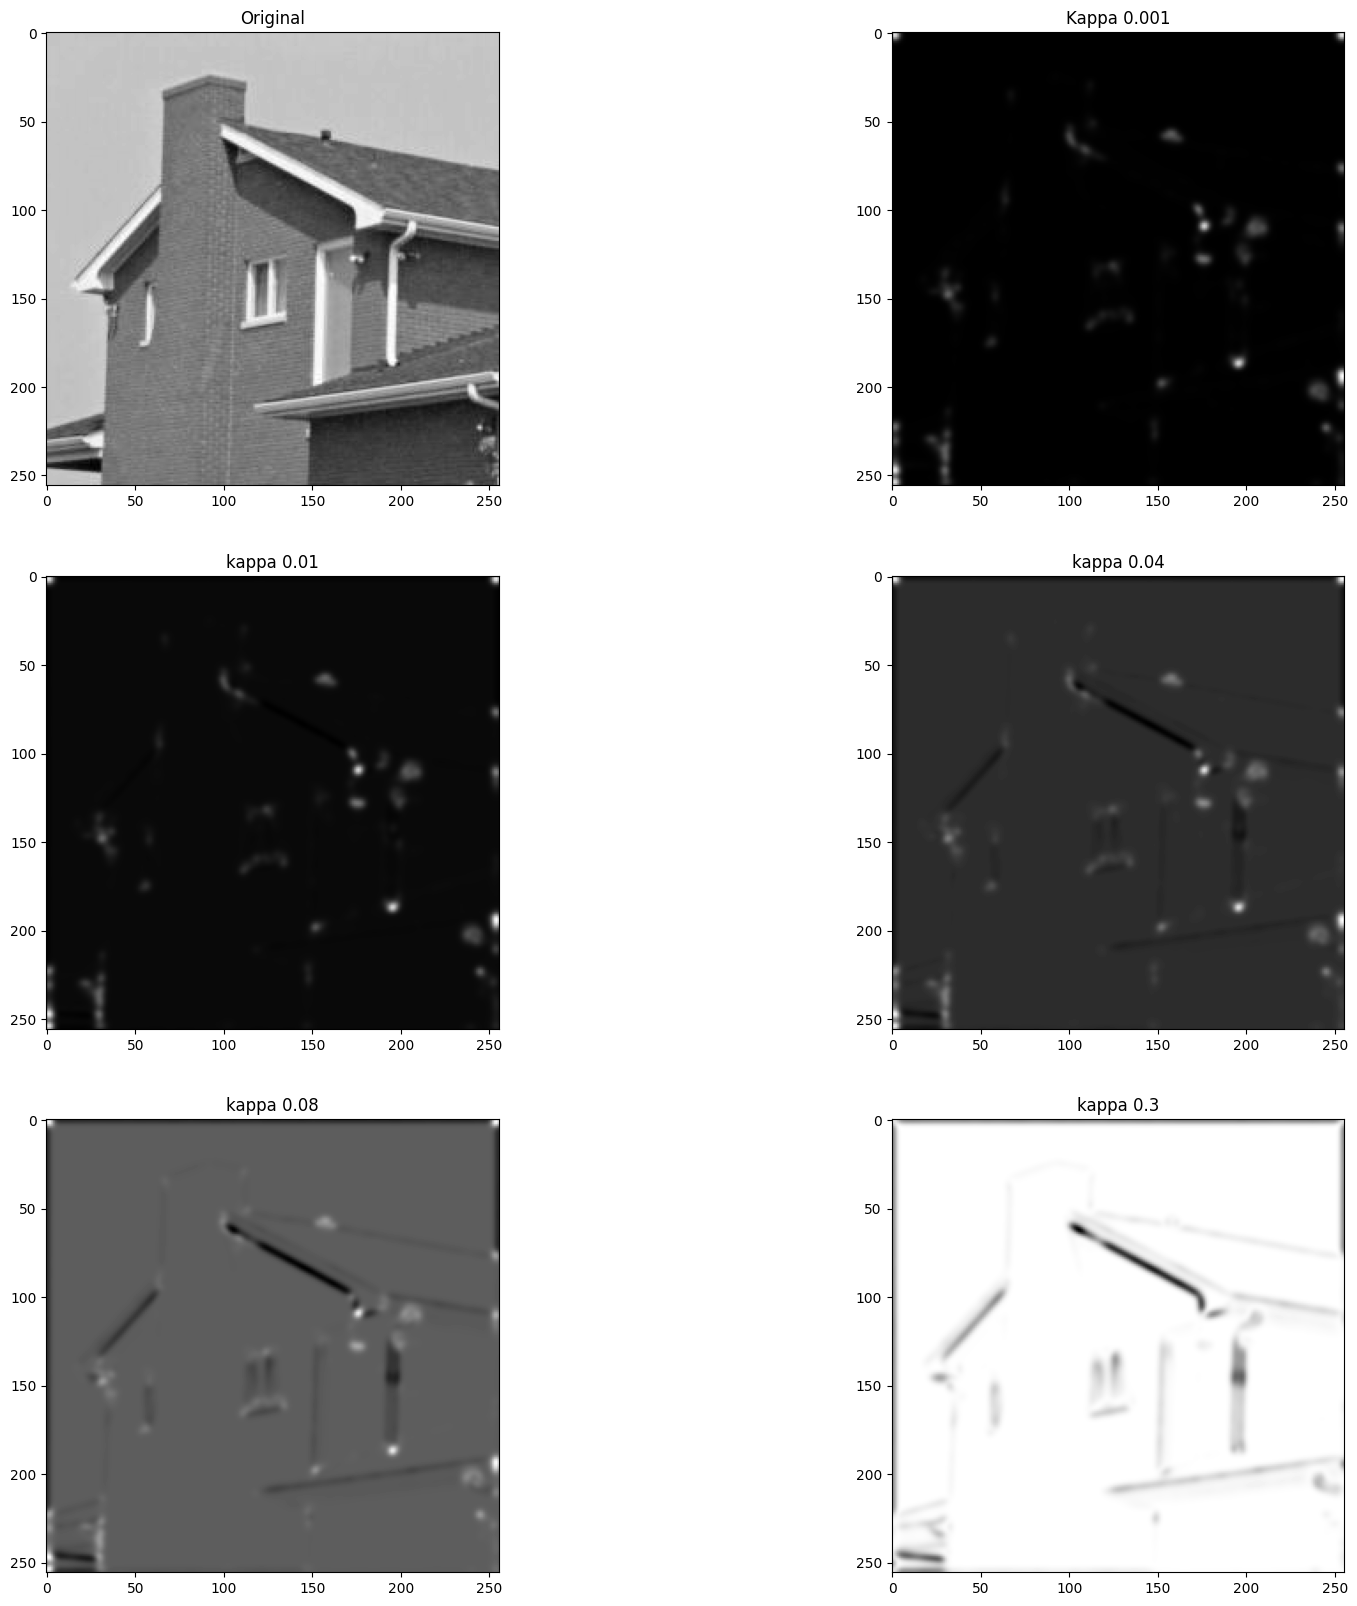

In [8]:
#different Kappa

fig, ax = plt.subplots(3,2,figsize=(20,20))
ax[0,0].imshow(img, cmap="gray")
ax[0,0].set_title("Original")
ax[0,1].imshow(computeR(img, 2.3, 0.001), cmap="gray")
ax[0,1].set_title("Kappa 0.001")
ax[1,0].imshow(computeR(img, 2.3, 0.01), cmap="gray")
ax[1,0].set_title("kappa 0.01")
ax[1,1].imshow(computeR(img, 2.3, 0.04), cmap="gray")
ax[1,1].set_title("kappa 0.04")
ax[2,0].imshow(computeR(img, 2.3, 0.08), cmap="gray")
ax[2,0].set_title("kappa 0.08")
ax[2,1].imshow(computeR(img, 2.3, 0.3), cmap="gray")
ax[2,1].set_title("kappa 0.3")

Text(0.5, 1.0, 'Gaussoan window 23')

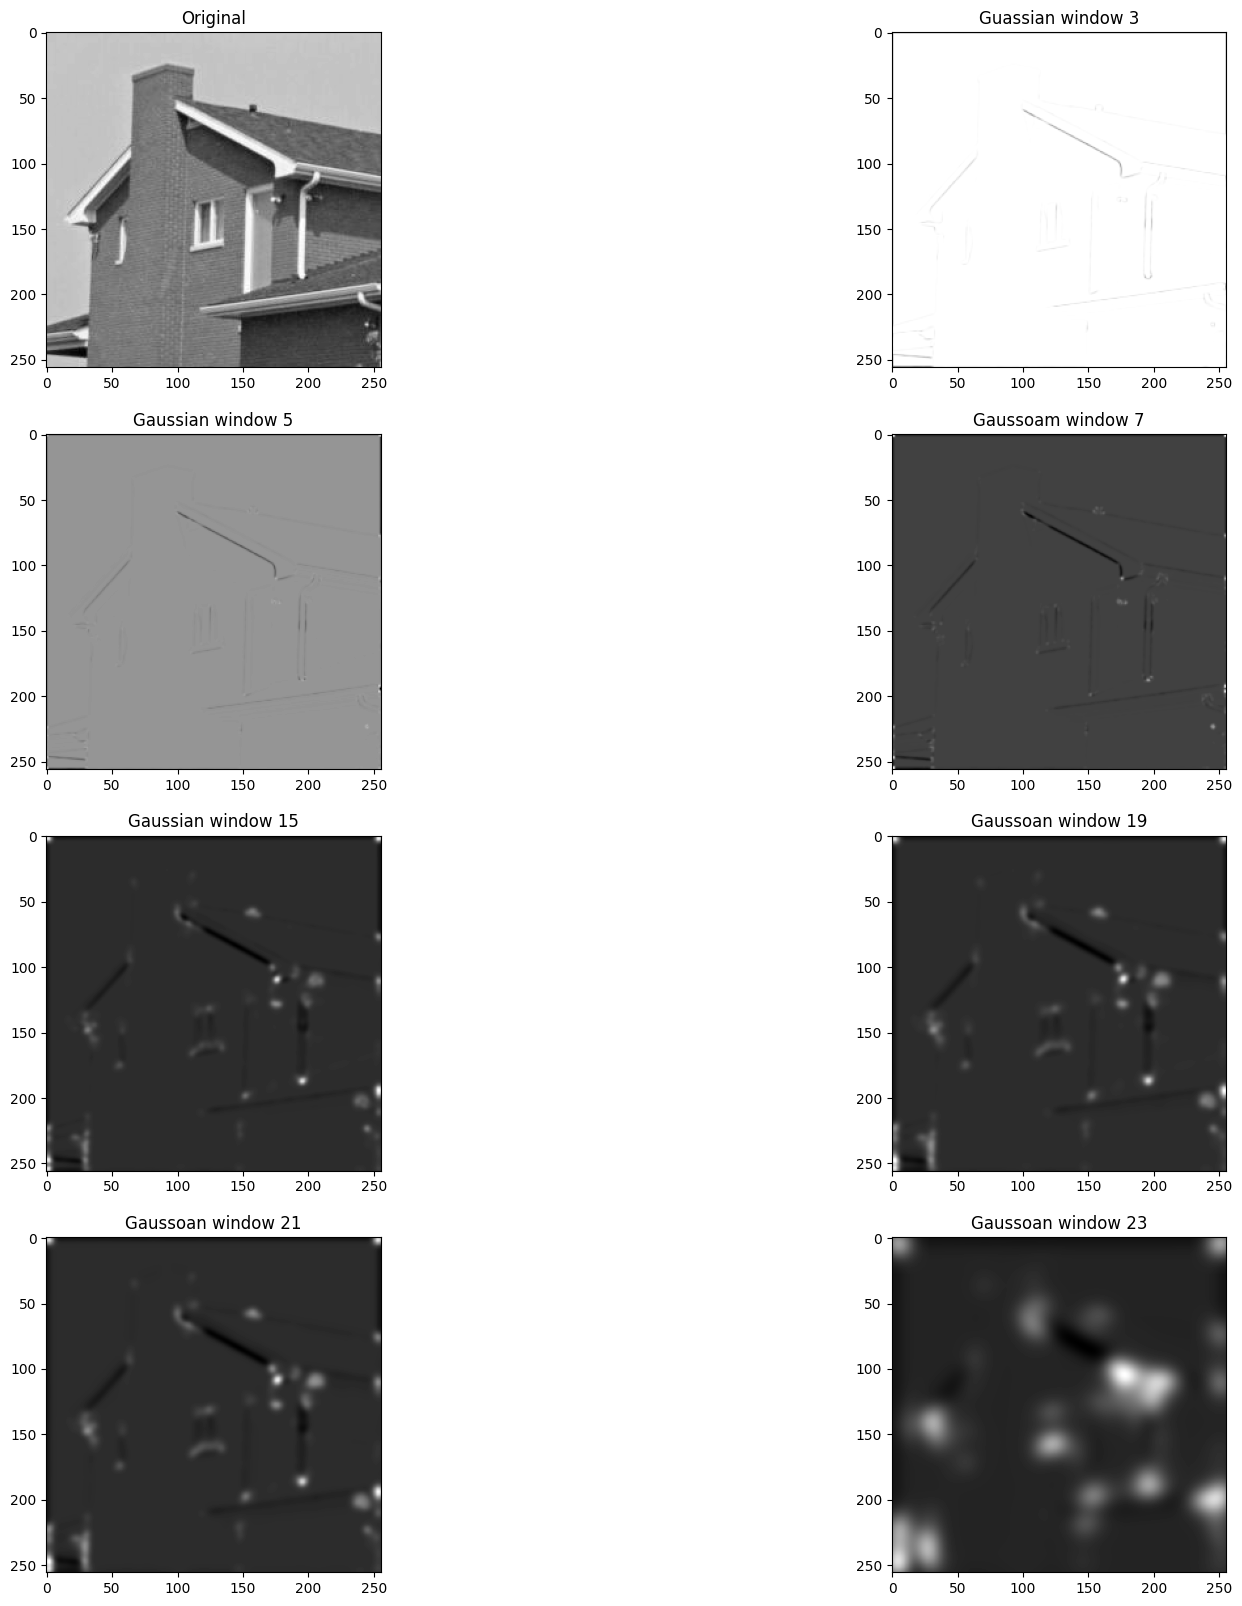

In [9]:
#different Sigma
fig, ax = plt.subplots(4,2,figsize=(20,20))
ax[0,0].imshow(img, cmap="gray")
ax[0,0].set_title("Original")
ax[0,1].imshow(computeR(img, 0.1, 0.04), cmap="gray")
ax[0,1].set_title("Guassian window 3")
ax[1,0].imshow(computeR(img, 0.5, 0.04), cmap="gray")
ax[1,0].set_title("Gaussian window 5")
ax[1,1].imshow(computeR(img, 0.9, 0.04), cmap="gray")
ax[1,1].set_title("Gaussoam window 7")
ax[2,0].imshow(computeR(img, 2.3, 0.04), cmap="gray")
ax[2,0].set_title("Gaussian window 15")
ax[2,1].imshow(computeR(img, 2.9, 0.04), cmap="gray")
ax[2,1].set_title("Gaussoan window 19")
ax[3,0].imshow(computeR(img, 3.1, 0.04), cmap="gray")
ax[3,0].set_title("Gaussoan window 21")
ax[3,1].imshow(computeR(img, 9, 0.04), cmap="gray")
ax[3,1].set_title("Gaussoan window 23")


3) Write in a few lines an interpretation of the results, explaining how the Harris response allows to detect and discriminate homogeneous areas, edges and corners.

Experiments with Kappa:
White spots are indicators of corners(positive). Black lines are showing edges(negative). Gray areas are flat regions.
As we decrease kappa value, edges get less and less visible, but corners are still there as we can still see the white spots. flat regions get darker.
if we increase kappa, flat regions get lighter and edges get more visible since its much easier to distinguish the black edges from the lighter background. corners are still visible. If we set kappa too high the flat regions turn completely white, so it's almost impossible to see the corners that are white spots. Edges are still completely visible though.

Experiments with Gaussian window size:
As we increase the window size, the picture gets blurrier so edges become thicker and white spots get bigger and overall less precise and distinguishable. If we decrease the window size too much corners become impossible to see.

In addition, the detector considers the edges of the image as corners as well, which couold be considered problematic.

## Exercise 2 : Harris corner detector
From the Harris response calculated at exercise 1, we will write all the functions needed for the Harris detector. Write the following functions: 

1) A function `thresholdR(R, thres)` that calculates and returns the binary thresholding $R_b$ of the response $R$ according to the threshold $thres$

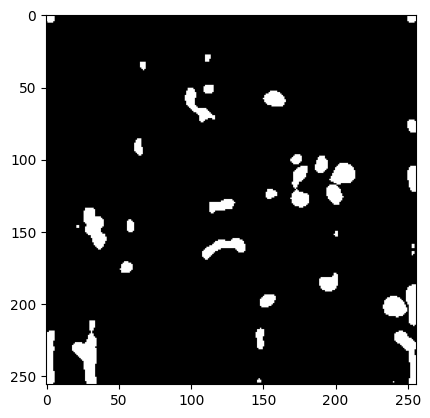

In [10]:
def thresholdR(R, thres):
    binary = np.copy(R)
    binary = R > thres
    return binary

binarized = thresholdR(harris, 100000000)
plt.imshow(binarized, cmap="gray")


2) A function `Rnms(R, Rbin)` that performs a non-maximum supression from the response $R$ and the binarized response $R_{bin}$. It returns the image $R_{locmax}$ (same size as $R$) =1 where $R_{bin}=1$ and the pixel has a greater value $R$ than its 8 nearest neighbors.

**Bonus**: Write a faster version of the script using Numpy function `np.roll()`.

Text(0.5, 1.0, 'Threshold 10^8')

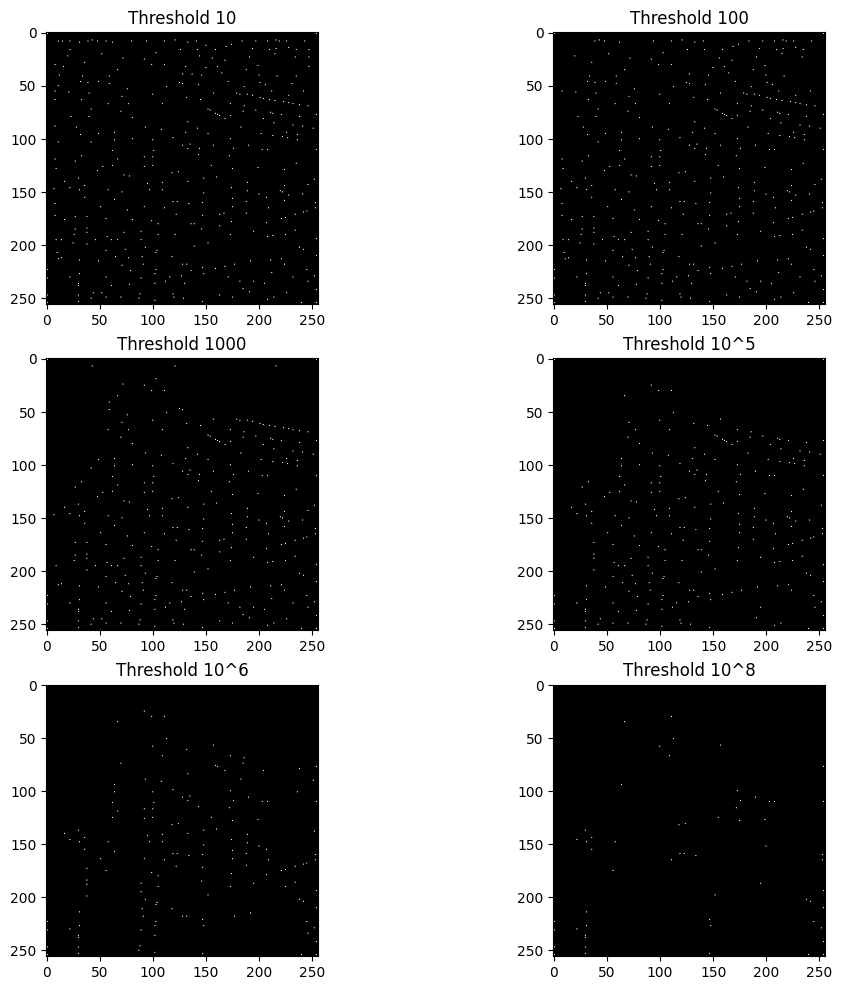

In [11]:
def find_neighbors(matrix, i, j, dist=1):
    #max for discarding negative indexes
    neighbours = [row[max(0, j-dist):j+dist+1] for row in matrix[max(0, i-1):i+dist+1]]
    return neighbours


def rnms(image_harris, Rbin):
    loc_max = np.zeros(image_harris.shape)
    for i in range(image_harris.shape[0]):
        for j in range(image_harris.shape[1]):
            if Rbin[i][j] ==1:
                maxima = np.max(find_neighbors(image_harris, i, j))
                if image_harris[i][j] >= np.max(maxima):
                    loc_max[i][j] = 1
    return loc_max


fig, ax = plt.subplots(3,2,figsize=(12,12))
ax[0,0].imshow(rnms(harris,thresholdR(harris, 10)), cmap="gray")
ax[0,0].set_title("Threshold 10")
ax[0,1].imshow(rnms(harris,thresholdR(harris, 100)), cmap="gray")
ax[0,1].set_title("Threshold 100")
ax[1,0].imshow(rnms(harris,thresholdR(harris, 10**3)), cmap="gray")
ax[1,0].set_title("Threshold 1000")
ax[1,1].imshow(rnms(harris,thresholdR(harris, 10**5)), cmap="gray")
ax[1,1].set_title("Threshold 10^5")
ax[2,0].imshow(rnms(harris,thresholdR(harris, 10**6)), cmap="gray")
ax[2,0].set_title("Threshold 10^6")
ax[2,1].imshow(rnms(harris,thresholdR(harris, 10**8)), cmap="gray")
ax[2,1].set_title("Threshold 10^8")


In [13]:
#Bonus
def Rnms(image_harris, Rbin):
    upper = np.roll(image_harris, 1, axis=0)
    lower = np.roll(image_harris, -1, axis=0)
    right = np.roll(image_harris, -1, axis=1)
    left  = np.roll(image_harris, 1, axis=1)
    loc_max = np.zeros(image_harris.shape)
    
    for i in range(image_harris.shape[0]):
        for j in range(image_harris.shape[1]):
            if Rbin[i][j]==1:
                if (image_harris[i][j]>upper[i,j] and image_harris[i][j]>lower[i,j]
                    and image_harris[i][j]>right[i,j] and image_harris[i][j]>left[i,j]):
                    loc_max[i][j] = 1
    return loc_max

Text(0.5, 1.0, 'Threshold 10^8')

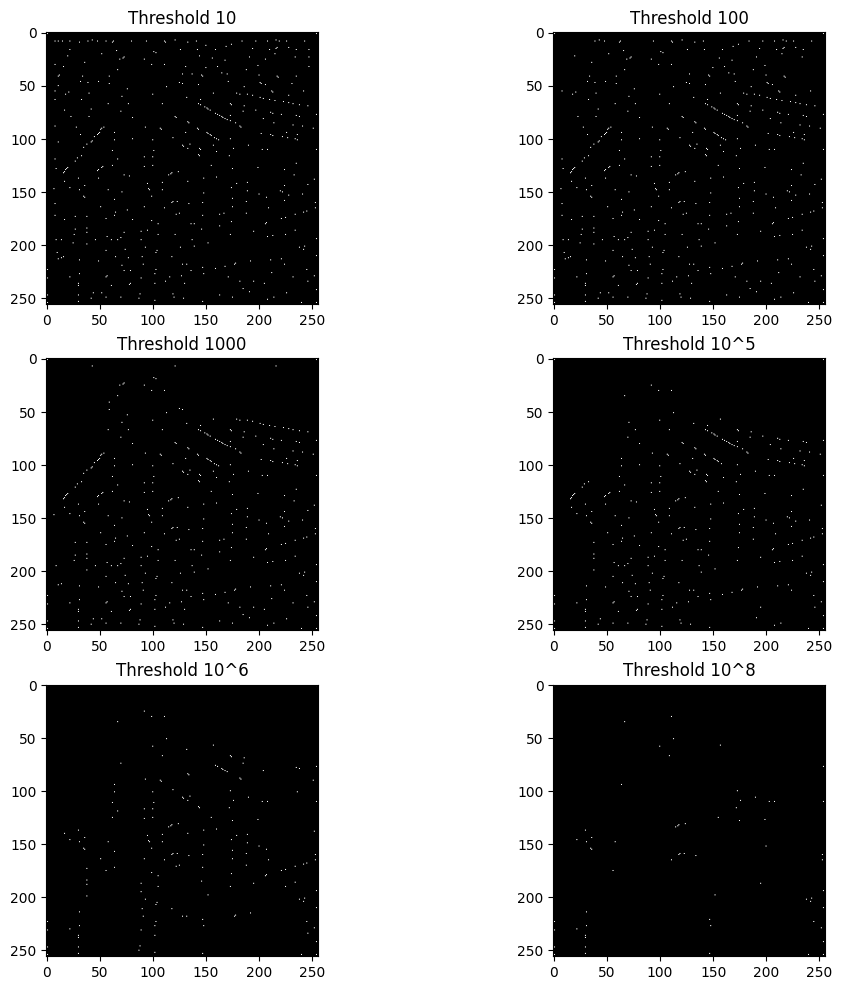

In [14]:
fig, ax = plt.subplots(3,2,figsize=(12,12))
ax[0,0].imshow(Rnms(harris,thresholdR(harris, 10)), cmap="gray")
ax[0,0].set_title("Threshold 10")
ax[0,1].imshow(Rnms(harris,thresholdR(harris, 100)), cmap="gray")
ax[0,1].set_title("Threshold 100")
ax[1,0].imshow(Rnms(harris,thresholdR(harris, 10**3)), cmap="gray")
ax[1,0].set_title("Threshold 1000")
ax[1,1].imshow(Rnms(harris,thresholdR(harris, 10**5)), cmap="gray")
ax[1,1].set_title("Threshold 10^5")
ax[2,0].imshow(Rnms(harris,thresholdR(harris, 10**6)), cmap="gray")
ax[2,0].set_title("Threshold 10^6")
ax[2,1].imshow(Rnms(harris,thresholdR(harris, 10**8)), cmap="gray")
ax[2,1].set_title("Threshold 10^8")

3) Write a function ``cornerDetector(image, scale, kappa, thresh)`` that returns an array of the same size as the image. The array takes two values: 1 where a corner is detected and 0 elsewhere.

In [15]:
def cornerDetector(image, sigma, kappa, thres):
    harris_response = computeR(image, sigma, kappa)
    Rbin = thresholdR(harris_response, thres)
    corners = rnms(harris_response, Rbin)
    return corners

4 ) Display the detected corners on the original image for the image ```img/house2.png```. Each detected corner will be displayed as a small red disk. You can use the functions ```np.nonzero()``` and ```plt.scatter()``` to that purpose.

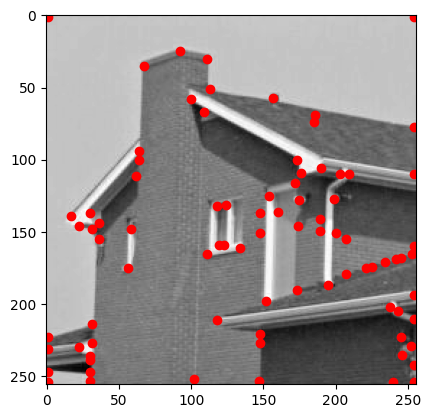

In [16]:
corners = cornerDetector(img, 2.2, 0.04, 10000000)
x, y = np.nonzero(corners)
plt.imshow(img, cmap="gray")
plt.scatter(y,x, color = 'red')
plt.show()

5) Evaluate the performances of the corner detector. Try to find good values for Sigma and Threshold.

When we increase the value of sigma too much, the detector misses many corners. If we decrease it too much it detects some insignificant or false corners or at some point no corner at all.

If we set the threshold low we get so many false corners. The threshold must be set really high for us to get good results.

The best result is achieved when sigma is 2.2 and threshold is set to 10^7(if more, we miss some important corners).

## Exercise 3 : Properties of Harris corner detector

The goal of this exercice is to study some invariance properties of Harris detector.

1) Write a script that detects the corners on the images ```img/toyHorse1.png``` and ```img/toyHorse2.png``` with a scale of 15 and appropriate threshold value. Display the detected corners on the images.

In [ ]:
toyHorse1 = np.array(Image.open("img/toyHorse1.png"))
toyHorse2 = np.array(Image.open("img/toyHorse2.png"))


fig, ax = plt.subplots(4,2, figsize=(14,14))
ax[0,0].imshow(toyHorse1, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse1, 15, 0.04, 100))
ax[0,0].scatter(y, x, c="r")

ax[0,1].imshow(toyHorse2, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse2, 15, 0.04, 100))
ax[0,1].scatter(y, x, c="r")

ax[1,0].imshow(toyHorse1, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse1, 15, 0.04, 10000))
ax[1,0].scatter(y, x, c="r")

ax[1,1].imshow(toyHorse2, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse2, 15, 0.04, 10000))
ax[1,1].scatter(y, x, c="r")


ax[2,0].imshow(toyHorse1, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse1, 15, 0.04, 1000000))
ax[2,0].scatter(y, x, c="r")

ax[2,1].imshow(toyHorse2, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse2, 15, 0.04, 1000000))
ax[2,1].scatter(y, x, c="r")

ax[3,0].imshow(toyHorse1, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse1, 15, 0.04, 10000000))
ax[3,0].scatter(y, x, c="r")


ax[3,1].imshow(toyHorse2, cmap="gray")
x, y = np.nonzero(cornerDetector(toyHorse2, 15, 0.04, 10000000))
ax[3,1].scatter(y, x, c="r")

2) What are the dynamic ranges of these two images ?

In [ ]:
horse1 = np.amax(toyHorse1) - np.amin(toyHorse1)
horse2 = np.amax(toyHorse2) - np.amin(toyHorse2)
print("Dynamic Range of Horse1: " + str(horse1))
print("Dynamic Range of Horse2: " + str(horse2))


3) What are the transformations beetween the two images ?

In the second image the toy horse is bit rotated. Also even though the two images have almost the same dynamic range, the second one is much darker because most pixels tend to have darker values.

4) Using a fixed threshold, is the detection invariant to rotation ? To affine transformation of brightness ?

In [ ]:
#testing with rotation

test = np.array(Image.open("img/carrelage_wikipedia.jpg"))
rotated = np.rot90(test,3)

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(test, cmap="gray")
x, y = np.nonzero(cornerDetector(test, 2.2, 0.04, 10000000))
ax[0].scatter(y, x, c="r")
ax[0].set_title("Original")
ax[1].imshow(rotated, cmap="gray")
x, y = np.nonzero(cornerDetector(rotated, 2.2, 0.04, 10000000))
ax[1].scatter(y, x, c="r")
ax[1].set_title("Rotated")

# corners = cornerDetector(img, 2.2, 0.04, 10000000)
# x, y = np.nonzero(corners)
# plt.imshow(img, cmap="gray")
# plt.scatter(y,x, color = 'red')
# plt.show()

In [ ]:
#testing with brightness
from PIL import Image, ImageEnhance

test2 = Image.open("img/Jussieu_wikipedia.jpg")
enhancer = ImageEnhance.Brightness(test2)
factor = 1.5 #darkens the image
dark = enhancer.enhance(factor)

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(test2, cmap="gray")
x, y = np.nonzero(cornerDetector(np.array(test2), 2.2, 0.04, 10000000))
ax[0].scatter(y, x, c="r")
ax[0].set_title("Original")
ax[1].imshow(np.array(dark), cmap="gray")
x, y = np.nonzero(cornerDetector(dark, 2.2, 0.04, 10000000))
ax[1].scatter(y, x, c="r")
ax[1].set_title("Darker")

C:\Users\mojan\AppData\Local\Temp\ipykernel_23492\2447529050.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n2 = np.int(np.ceil(3*sigma))


Text(0.5, 1.0, 'Shifted to the right')

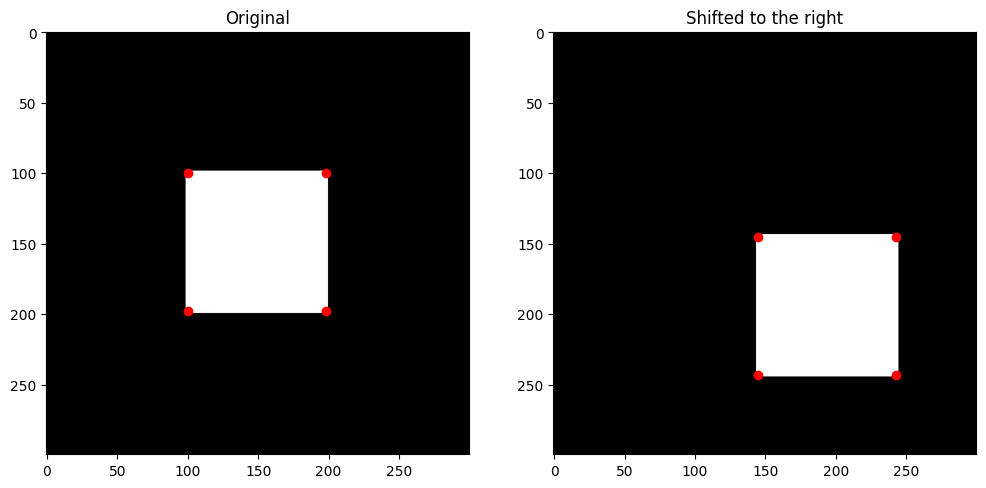

In [105]:
#testing for translation 
test3 = np.array(Image.open("img/rectangle.png"))

shift = np.roll(test3, 45, axis=0)
shift = np.roll(shift, 45, axis=1) 

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(test3, cmap="gray")
x, y = np.nonzero(cornerDetector(test3, 2.2, 0.04, 10000000))
ax[0].scatter(y, x, c="r")
ax[0].set_title("Original")
ax[1].imshow(shift, cmap="gray")
x, y = np.nonzero(cornerDetector(shift, 2.2, 0.04, 10000000))
ax[1].scatter(y, x, c="r")
ax[1].set_title("Shifted to the right")

We almost get the same result, most detections are consistent at all angles. So we can say it is invariant to rotation, illumination and also translation unless it is illogically overdone.